In [ ]:
!pip install kaggle opencv-python

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{\r\n  "username": "diptiramnath",\r\n  "key": "KGAT_956fa3600dcbdba2425bca2f1369ae78"\r\n}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                             title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
amar5693/screen-time-sleep-and-stress-analysis-dataset          Screen Time, Sleep & Stress Analysis Dataset            787136  2026-02-13 06:56:18.757000           3321         67  1.0              
amar5693/student-performance-dataset                            Student Performance Dataset                             177286  2026-02-12 06:04:44.613000           3129         49  1.0              
aliiihussain/amazon-sales-dataset                               Amazon_Sales_Dataset                                   1297759  2026-02-01 11:37:12.353000           6809        111  1.0              


In [2]:
!cat kaggle.json

cat: kaggle.json: No such file or directory


In [3]:
%%writefile kaggle.json
{
  "username": "diptiramnath",
  "key": "KGAT_956fa3600dcbdba2425bca2f1369ae78"
}

Writing kaggle.json


In [4]:
!cat kaggle.json

{
  "username": "diptiramnath",
  "key": "KGAT_956fa3600dcbdba2425bca2f1369ae78"
}


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                                  title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
amar5693/screen-time-sleep-and-stress-analysis-dataset               Screen Time, Sleep & Stress Analysis Dataset            787136  2026-02-13 06:56:18.757000           4288         84  1.0              
amar5693/student-performance-dataset                                 Student Performance Dataset                             177286  2026-02-12 06:04:44.613000           3861         62  1.0              
aliiihussain/amazon-sales-dataset                                    Amazon_Sales_Dataset                                   1297759  2026-02-01 11:37:12.353000           7434      

In [8]:
!kaggle datasets download -d moltean/fruits
!unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_17.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_173.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_177.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_181.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_185.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_189.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_193.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_197.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Raspberry 3/r0_201.jpg  
  inflating: fruits-360_original-size/fruits-360-original-s

In [10]:
!ls

fruits-360_100x100	   fruits-360_multi	     kaggle.json
fruits-360_3-body-problem  fruits-360_original-size  sample_data
fruits-360_meta		   fruits.zip


In [11]:
!ls Training

ls: cannot access 'Training': No such file or directory


In [13]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

DATASET_PATH = "Training"

FRUITS = {
    "Banana": {
        "folder": "Banana",
        "hsv": [(np.array([20,100,100]), np.array([30,255,255]))]
    },
    "Apple": {
        "folder": "Apple Red 1",
        "hsv": [
            (np.array([0,120,70]), np.array([10,255,255])),
            (np.array([160,120,70]), np.array([180,255,255]))
        ]
    },
    "Orange": {
        "folder": "Orange",
        "hsv": [(np.array([10,100,100]), np.array([20,255,255]))]
    }
}

In [15]:
!ls

fruits-360_100x100	   fruits-360_multi	     kaggle.json
fruits-360_3-body-problem  fruits-360_original-size  sample_data
fruits-360_meta		   fruits.zip


In [16]:
!ls fruits-360

ls: cannot access 'fruits-360': No such file or directory


In [17]:
!ls fruits-360_100x100

fruits-360


In [18]:
!ls fruits-360_100x100/Training

ls: cannot access 'fruits-360_100x100/Training': No such file or directory


In [19]:
!ls fruits-360_100x100/fruits-360

LICENSE  README.md  Test  Training


In [20]:
!ls fruits-360_100x100/fruits-360/Training

'Almonds 1'		 'Cucumber 1'		 'Pear 6'
'Apple 10'		 'Cucumber 10'		 'Pear 7'
'Apple 11'		 'Cucumber 11'		 'Pear 8'
'Apple 12'		 'Cucumber 12'		 'Pear 9'
'Apple 13'		 'Cucumber 13'		 'Pear Abate 1'
'Apple 14'		 'Cucumber 3'		 'Pear Forelle 1'
'Apple 17'		 'Cucumber 4'		 'Pear Kaiser 1'
'Apple 18'		 'Cucumber 5'		 'Pear Monster 1'
'Apple 19'		 'Cucumber 6'		 'Pear Red 1'
'Apple 20'		 'Cucumber 7'		 'Pear Stone 1'
'Apple 21'		 'Cucumber 8'		 'Pear Williams 1'
'Apple 22'		 'Cucumber 9'		 'Pepino 1'
'Apple 23'		 'Dates 1'		 'Pepper 1'
'Apple 5'		 'Eggplant 1'		 'Pepper 2'
'Apple 6'		 'Eggplant long 1'	 'Pepper Green 1'
'Apple 7'		 'Fig 1'		 'Pepper Orange 1'
'Apple 8'		 'Ginger 2'		 'Pepper Orange 2'
'Apple 9'		 'Ginger Root 1'	 'Pepper Red 1'
'Apple Braeburn 1'	 'Gooseberry 1'		 'Pepper Red 2'
'Apple Crimson Snow 1'	 'Granadilla 1'		 'Pepper Red 3'
'Apple Golden 1'	 'Grape 1'		 'Pepper Red 4'
'Apple Golden 2'	 'Grape Blue 1'		 'Pepper Red 5'
'Apple Golden 3'	 'Grapefruit Pink 1'	 'Pepper Ye

In [25]:
FRUITS = {
    "Banana 1": {
        "folder": "Banana 1",
        "hsv": [(np.array([20,100,100]), np.array([30,255,255]))]
    },
    "Apple Red 1": {
        "folder": "Apple Red 1",
        "hsv": [
            (np.array([0,120,70]), np.array([10,255,255])),
            (np.array([160,120,70]), np.array([180,255,255]))
        ]
    },
    "Orange": {
        "folder": "Orange",
        "hsv": [(np.array([10,100,100]), np.array([20,255,255]))]
    }
}

In [26]:
!ls fruits-360_100x100/fruits-360/Training | grep Banana

Banana 1
Banana 3
Banana 4
Banana Lady Finger 1
Banana Red 1


In [27]:
import pandas as pd

df = pd.DataFrame(results, columns=["Fruit", "Image", "Detected"])
df.to_csv("fruit_detection_results.csv", index=False)

df.head()

,Fruit,Image,Detected


In [28]:
df.groupby("Fruit")["Detected"].mean()

,Detected
Fruit,


In [29]:
df.to_csv("fruit_detection_results.csv", index=False)
print("Saved fruit_detection_results.csv")

Saved fruit_detection_results.csv


In [30]:
summary = df.groupby("Fruit")["Detected"].agg(
    Total_Images="count",
    Detected_Count="sum",
    Detection_Rate="mean"
)

summary

,Total_Images,Detected_Count,Detection_Rate
Fruit,,,


In [34]:
DATASET_PATH = "fruits-360_100x100/fruits-360/Training"

In [35]:
def show_sample_detection(fruit_key):
    info = FRUITS[fruit_key]
    folder = info["folder"]

    folder_path = os.path.join(DATASET_PATH, folder)
    print("Reading from:", folder_path)

    img_name = os.listdir(folder_path)[0]
    img_path = os.path.join(folder_path, img_name)

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    mask = np.zeros(hsv.shape[:2], dtype=np.uint8)
    for lower, upper in info["hsv"]:
        mask += cv2.inRange(hsv, lower, upper)

    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    num_labels, _, stats, _ = cv2.connectedComponentsWithStats(mask)

    output = img_rgb.copy()
    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] > 500:
            x = stats[i, cv2.CC_STAT_LEFT]
            y = stats[i, cv2.CC_STAT_TOP]
            w = stats[i, cv2.CC_STAT_WIDTH]
            h = stats[i, cv2.CC_STAT_HEIGHT]
            cv2.rectangle(output, (x,y), (x+w,y+h), (0,255,0), 2)
            cv2.putText(output, fruit_key, (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)

    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.imshow(img_rgb)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(mask, cmap="gray")
    plt.title("Mask")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(output)
    plt.title("Detected Output")
    plt.axis("off")

    plt.show()

Reading from: fruits-360_100x100/fruits-360/Training/Banana 1


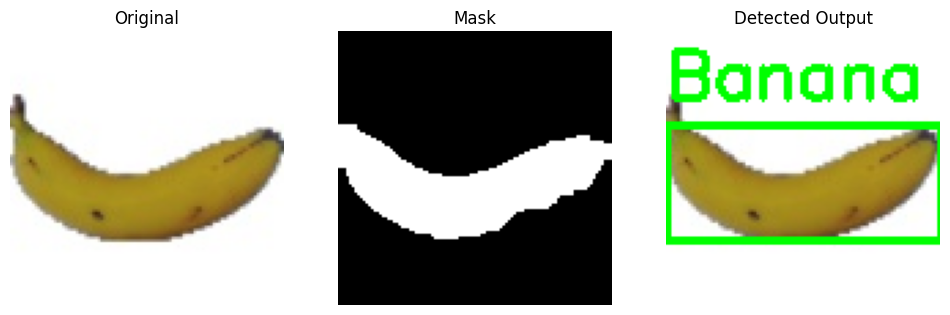

Reading from: fruits-360_100x100/fruits-360/Training/Apple Red 1


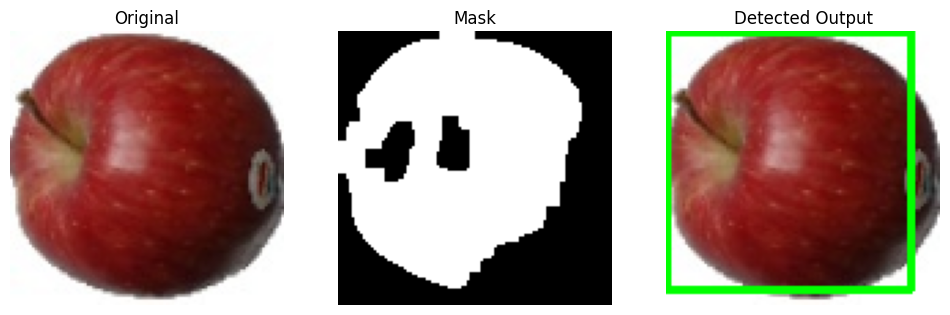

In [37]:
show_sample_detection("Banana 1")
show_sample_detection("Apple Red 1")